<a href="https://colab.research.google.com/github/AchmadAinunNaim/Semester5_PCVK/blob/main/Minggu6/Praktikum_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tugas Praktikum 06**

## **TUGAS 01**

In [ ]:
from google.colab import drive

# accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **TUGAS 02**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## **TUGAS 03**

<BarContainer object of 256 artists>

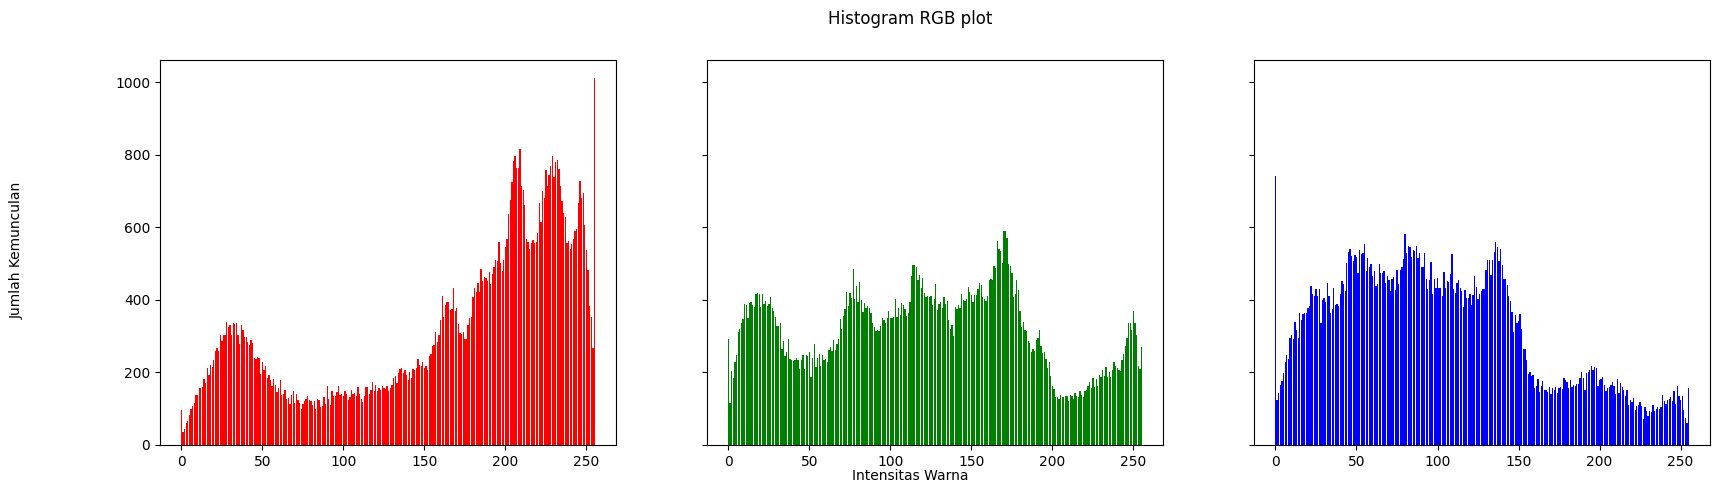

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

# Untuk akumulasi warna RGB maka *256
blue = [0]*256
green = [0]*256
red = [0]*256

# += 1 digunakan untuk menambah 1 jika jumlah suatu warna bertambah hingga tidak bertambah lagi
for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]] += 1
    red[image[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


## **TUGAS 04**

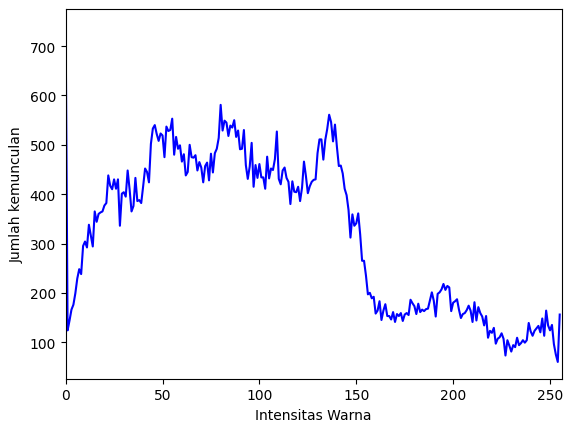

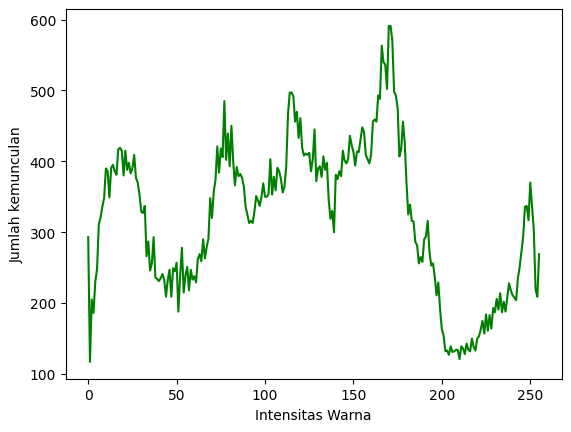

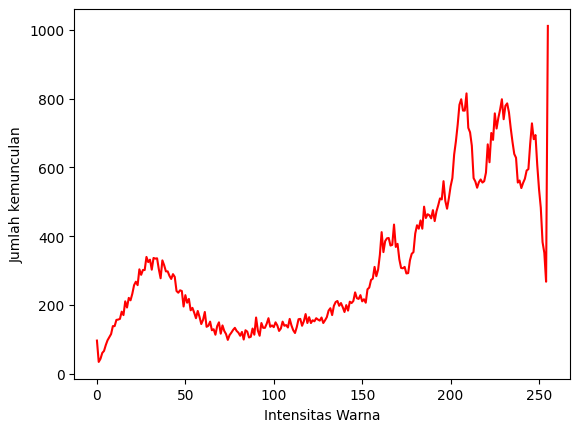

In [ ]:
colors = ("b","g","r")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

## **TUGAS 05**

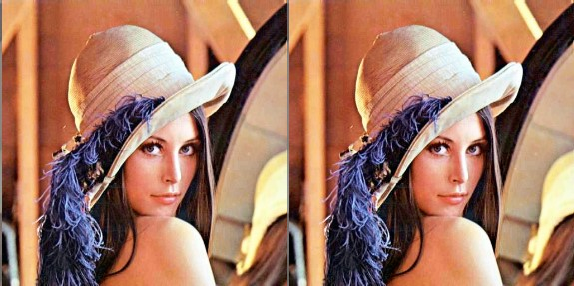

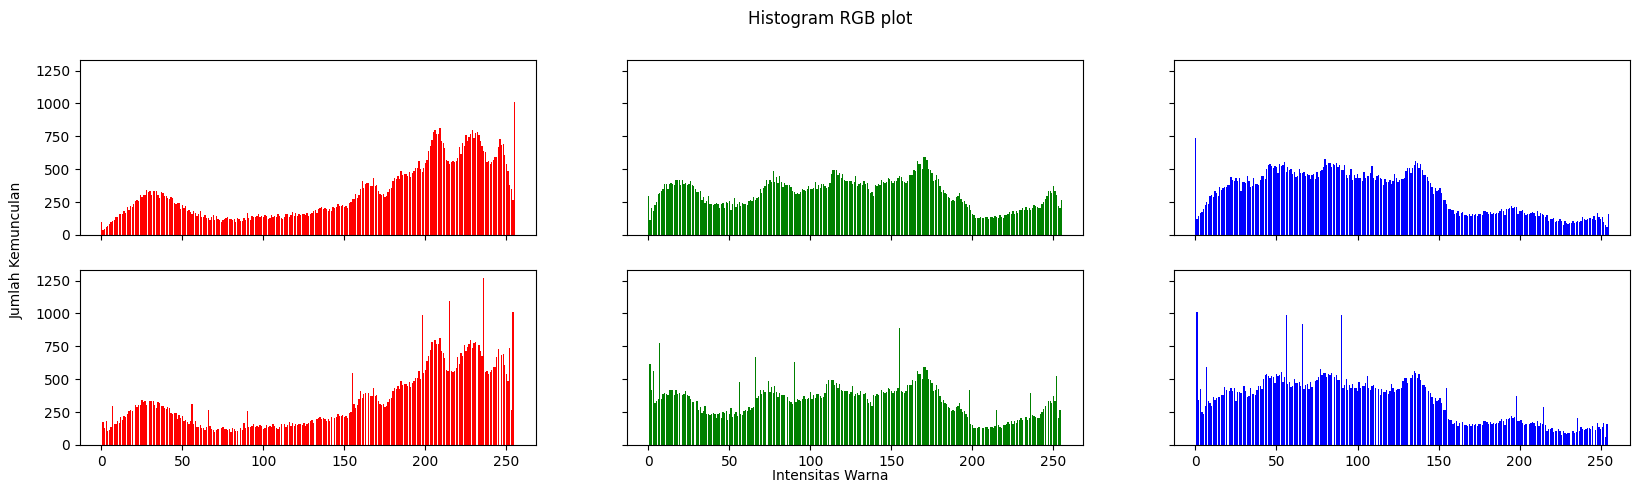

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histogram_asli = histog(img)

# Menconvert ke Numpy array
img_array = np.asarray(img)

# Normalized cumulative histogram
# Flatten image array and calculate histogram dg binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

# Normalized cumulative histogram
cum_histo = np.cumsum(histogram_array)

# Pixel mapping lookup table
transform_map = np.floor(255 * cum_histo). astype (np.uint8)

# Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='red')
  axs[0,1].bar(names, histogram_asli[1], color='green')
  axs[0,2].bar(names, histogram_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## **TUGAS 06**

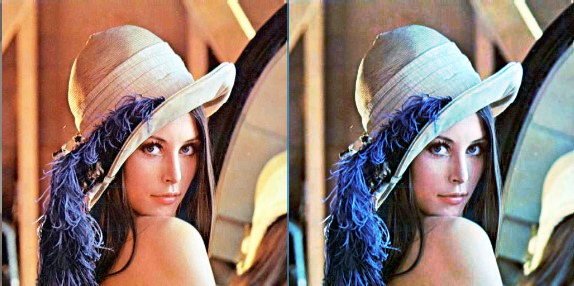

<BarContainer object of 256 artists>

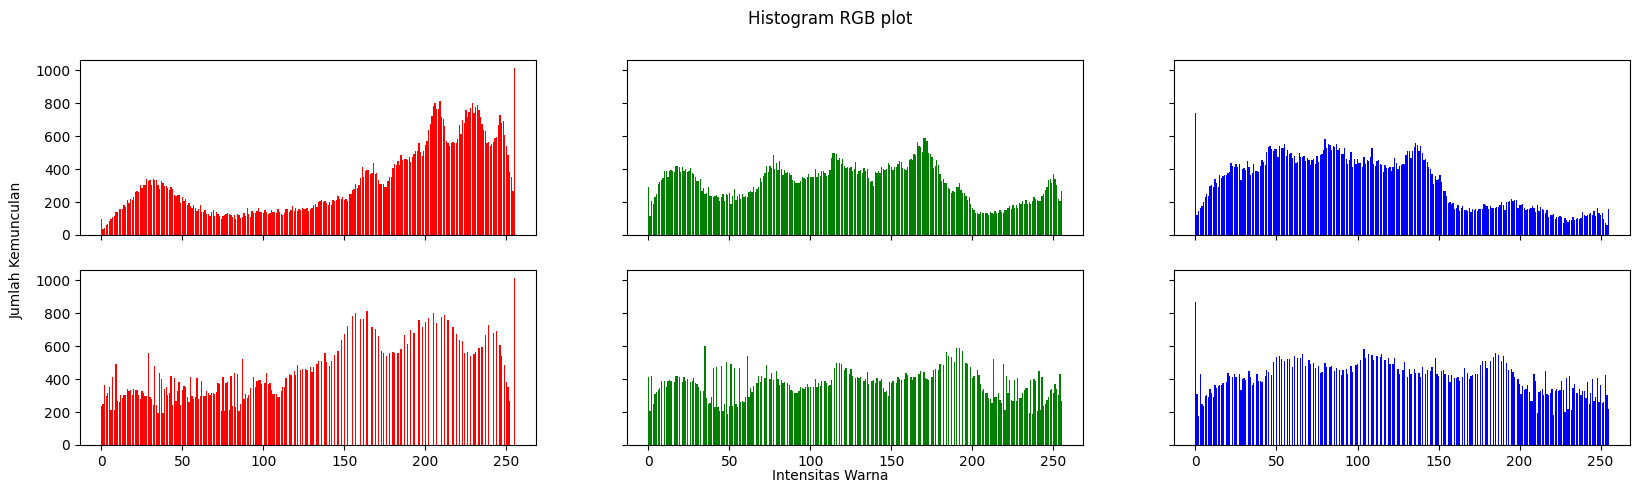

In [ ]:
img  = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for h in range(0,height):
    for w in range(0,width):
      ax[0][img1[h][w][0]] += 1
      ax[1][img1[h][w][1]] += 1
      ax[2][img1[h][w][2]] += 1
  return ax

histo_asli = histog(img)

channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

## **TUGAS 07**

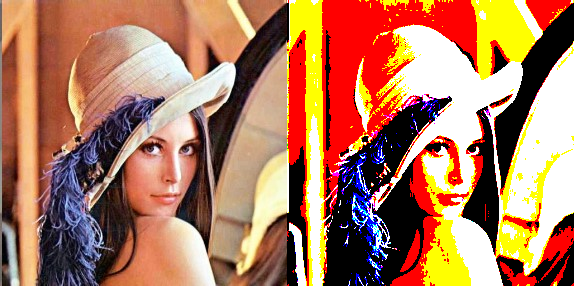

In [ ]:
lena_original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)



## **TUGAS 08**

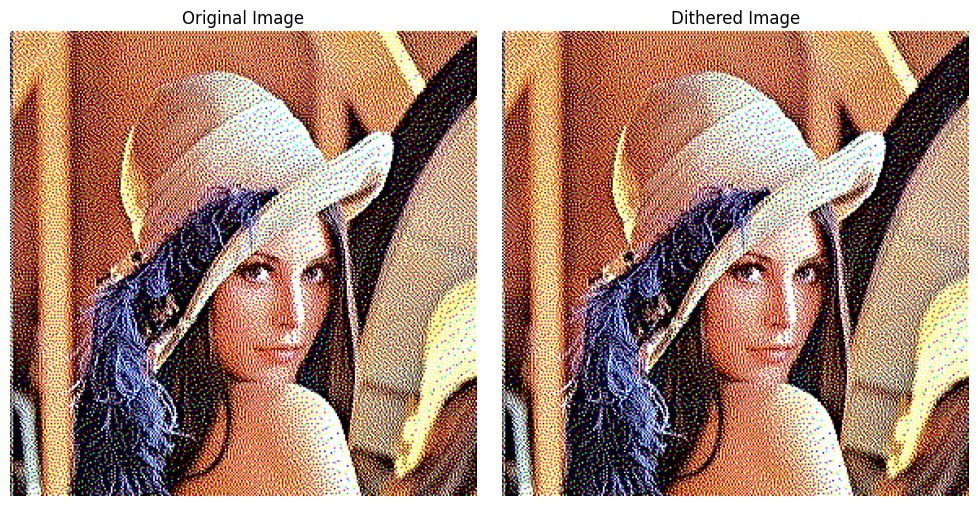

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

# Load the original input image
input_image_path = "/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg"
input_image = Image.open(input_image_path)

# Apply dithering
output_image = apply_dithering(input_image)

# Plotting the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

# Plot the dithered image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Display the images
# cv2_imshow(input_image_path)
plt.tight_layout()
plt.show()


## **Tugas 09**

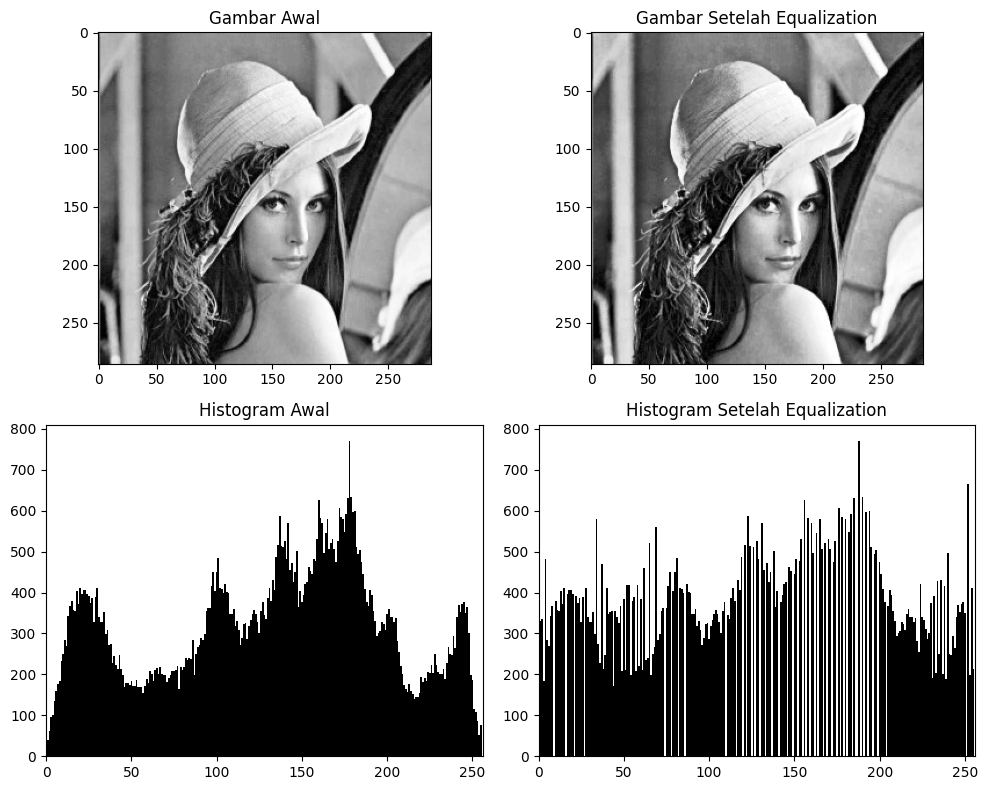

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar input "lena_lc.jpg"
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Menghitung histogram citra awal
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])

# 3. Melakukan histogram equalization
equalized_image = cv2.equalizeHist(image)

# 4. Menghitung histogram citra setelah histogram equalization
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# 5. Menampilkan gambar dan histogram dalam satu tampilan
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Gambar Awal
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
axes[0, 0].set_title('Gambar Awal')

# Histogram Awal (batang)
axes[1, 0].bar(np.arange(256), hist_original[:, 0], color='black', width=1.0)
axes[1, 0].set_title('Histogram Awal')
axes[1, 0].set_xlim([0, 256])

# Gambar setelah Equalization
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Gambar Setelah Equalization')

# Histogram setelah Equalization (batang)
axes[1, 1].bar(np.arange(256), hist_equalized[:, 0], color='black', width=1.0)
axes[1, 1].set_title('Histogram Setelah Equalization')
axes[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()


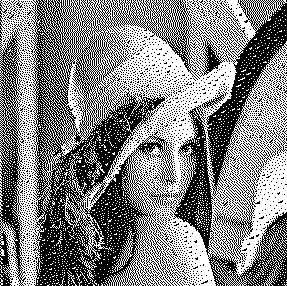

In [ ]:
from PIL import Image
import cv2
import numpy as np

# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu 06/gambar lena.jpg')

# Mengonversi gambar ke citra grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendapatkan dimensi citra
height, width = gray_img.shape

# Loop melalui semua piksel citra
for y in range(height):
    for x in range(width):
        old_value = gray_img[y, x]
        new_value = 0
        if old_value > 128:
            new_value = 255
        gray_img[y, x] = new_value
        quant_error = old_value - new_value

        # Menjalankan algoritma Floyd-Steinberg
        if x + 1 < width:
            gray_img[y, x + 1] = gray_img[y, x + 1] + quant_error * 7 / 16
        if x > 0 and y + 1 < height:
            gray_img[y + 1, x - 1] = gray_img[y + 1, x - 1] + quant_error * 3 / 16
        if y + 1 < height:
            gray_img[y + 1, x] = gray_img[y + 1, x] + quant_error * 5 / 16
        if x + 1 < width and y + 1 < height:
            gray_img[y + 1, x + 1] = gray_img[y + 1, x + 1] + quant_error * 1 / 16

# Menampilkan gambar hasil
cv2_imshow(gray_img)